#### Import Packages

In [2]:
import cv2
from IPython.display import display
from PIL import Image
import numpy as  np

#### Display the image

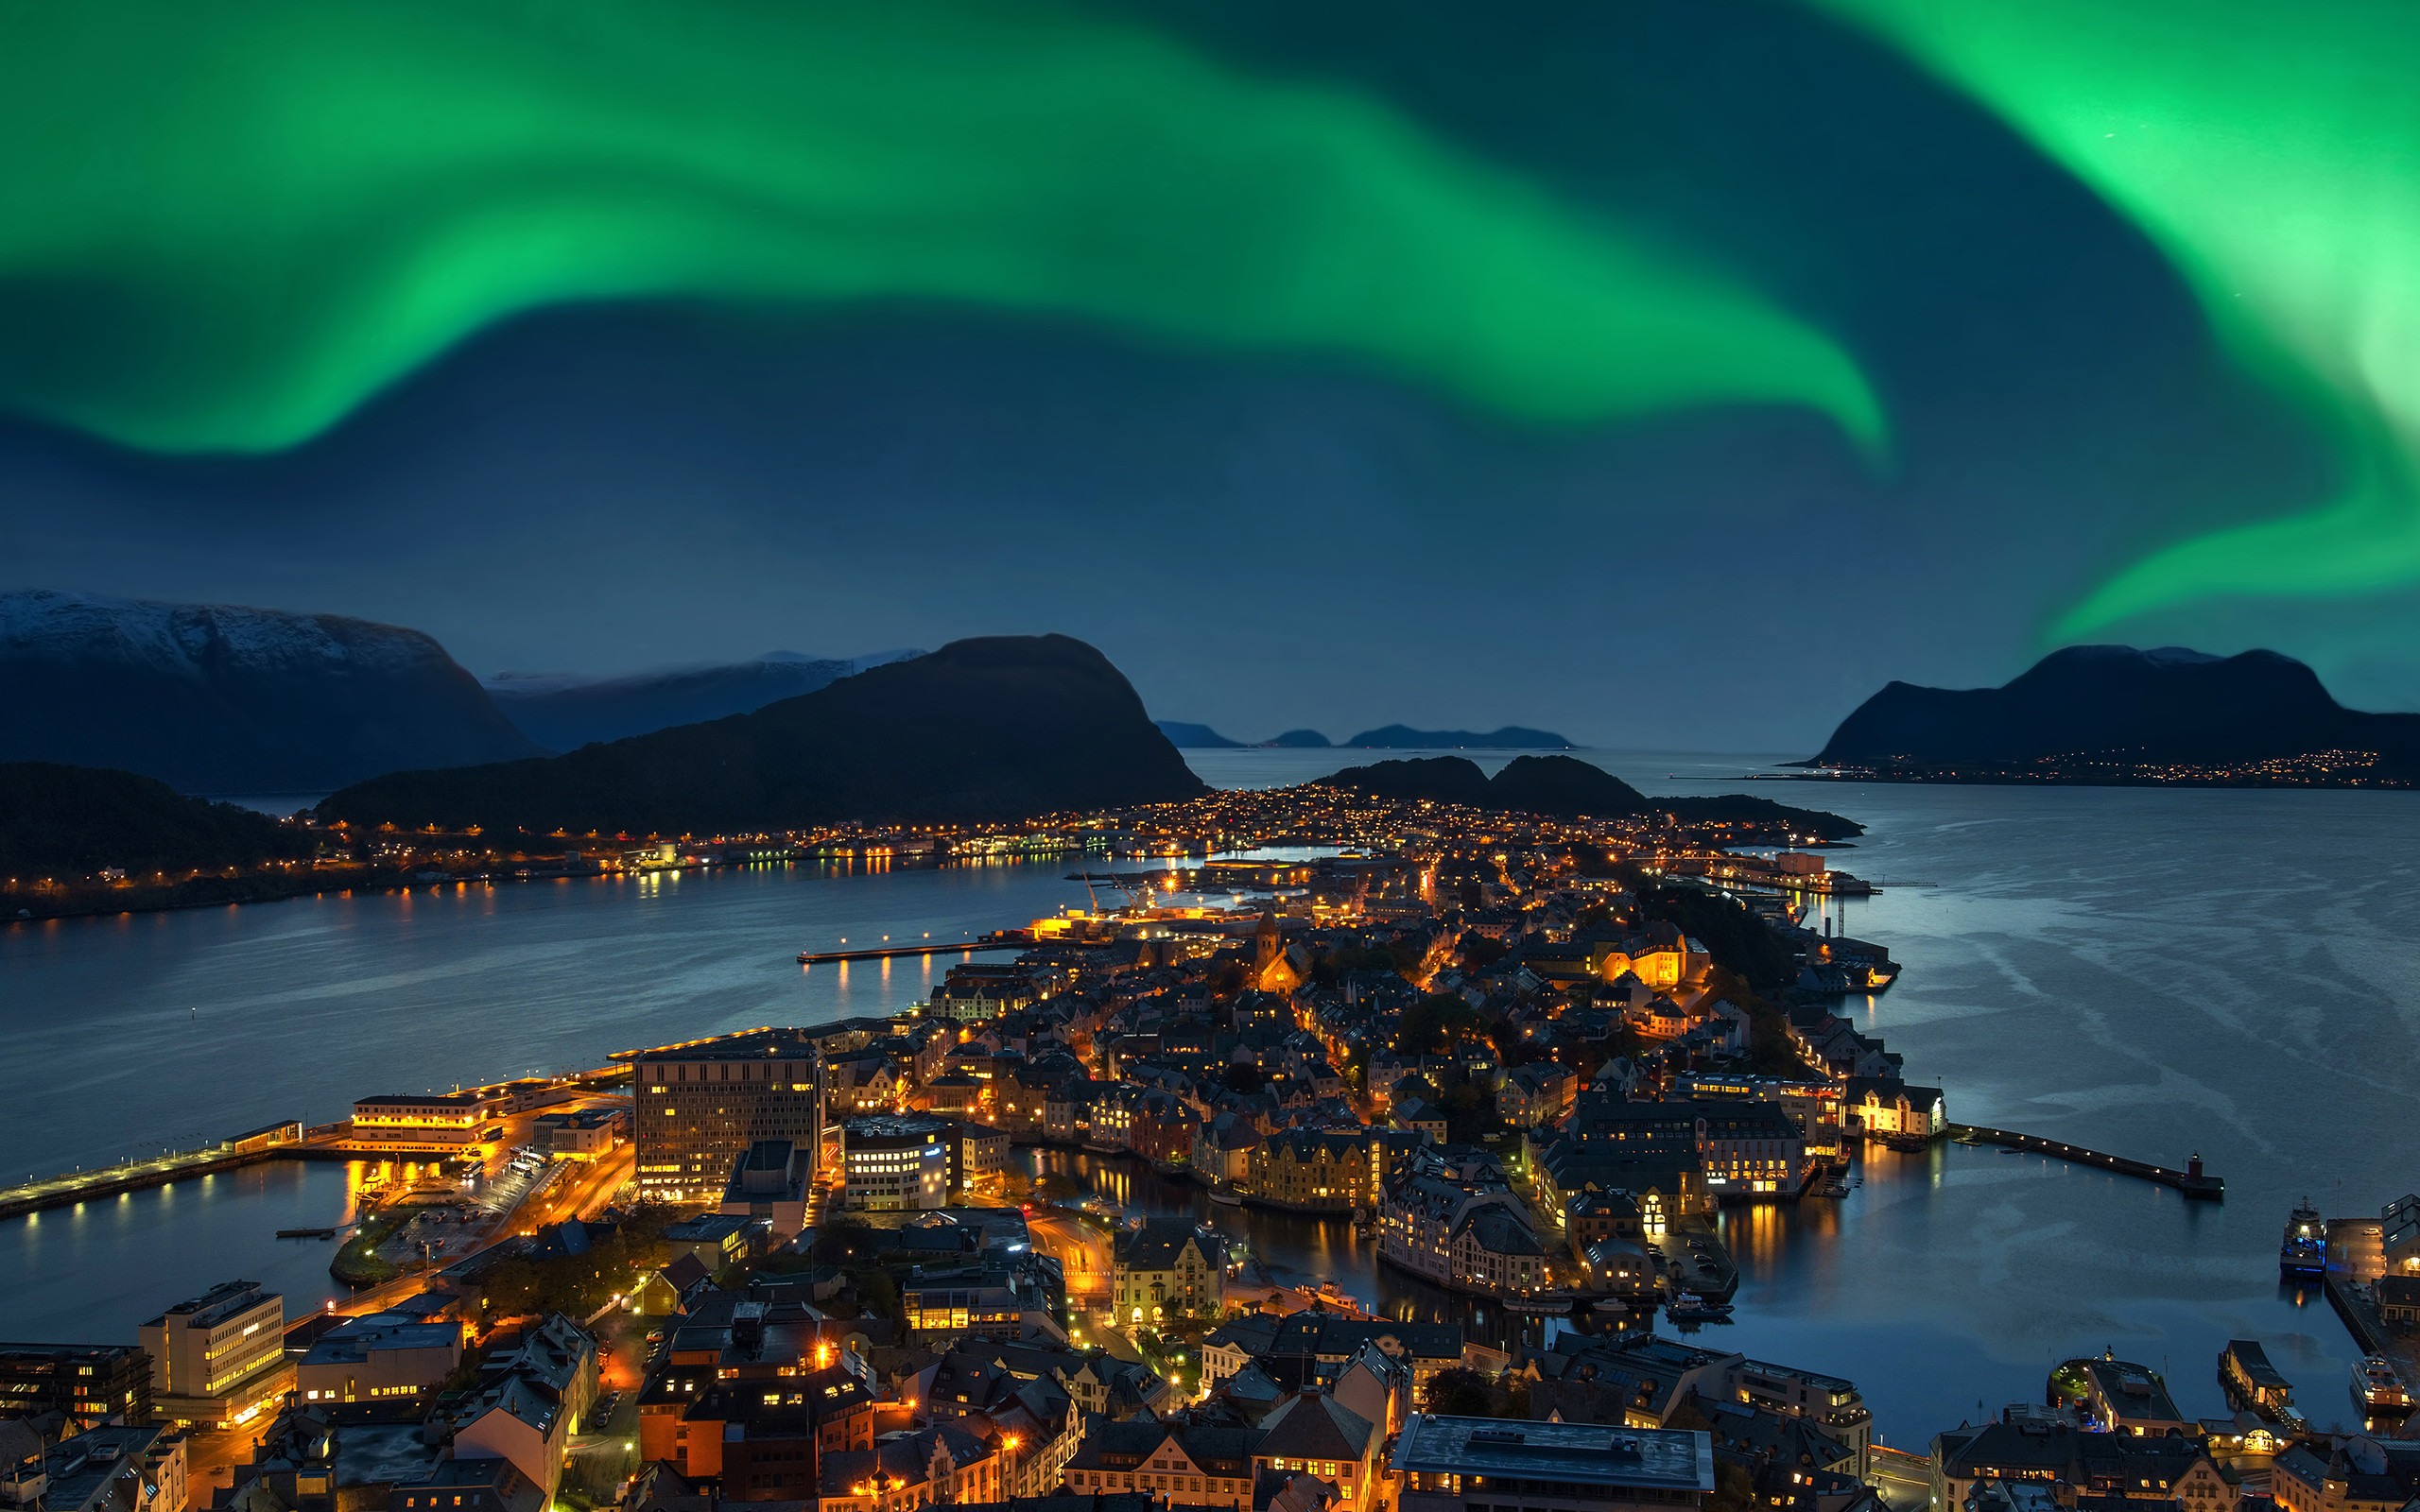

In [4]:
img=Image.open(r"C:\Users\uthri\Pictures\Default.jpg")
img

#### Load the image

In [7]:
img = cv2.imread(r'C:\Users\uthri\Pictures\Default.jpg')

#### Intialize SIFT & SURF Features 

In [8]:
sift=cv2.SIFT_create()

## a)Scaling the Image

In [9]:
scale_factor=2
new_width=int(img.shape[1]*scale_factor)
new_height=int(img.shape[0]*scale_factor)
resized_img=cv2.resize(img,(new_width,new_height))

#### Detect and compute keypoints and descriptors using SIFT and SURF


In [10]:
keypoints_sift, descriptors_sift = sift.detectAndCompute(resized_img, None)

#### Draw the detected keypoints on the image

In [11]:
img_sift = cv2.drawKeypoints(resized_img, keypoints_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


#### Display the original and scaled images with keypoints

In [12]:
cv2.imshow('Original Image', img)
cv2.imshow('Scaled Image', resized_img)
i2=cv2.imshow('SIFT Keypoints', img_sift)
cv2.imshow('SURF Keypoints', img_surf)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


## Rotating the image

#### Detect and compute keypoints and descriptors using SIFT

In [ ]:
kp1, des1 = sift.detectAndCompute(img, None)


#### Define rotation angle in degrees

In [ ]:
angle = 45
# Rotate the image using the defined angle
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
scale=1.0
M = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(img, M, (w, h))#When rotating an image, an affine transformation matrix is used to map the original image to a rotated image.

#### Detect and compute keypoints and descriptors using SIFT on the rotated image


In [ ]:
kp2, des2 = sift.detectAndCompute(rotated_img, None)


#### Find matches between the keypoints of the original image and the rotated image


In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

#### Apply ratio test to filter good matches


In [ ]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append([m])

#### Draw the matches

In [ ]:
result_img = cv2.drawMatchesKnn(img, kp1, rotated_img, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


#### Display the result image

In [ ]:
cv2.imshow('Result', result_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## Affine Transformation

#### Convert to gray scale

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#### Initialize SIFT detector and find keypoints and descriptors

In [ ]:
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

#### Define the corners of the image to which we want to transform

In [ ]:
src_pts = np.float32([[0, 0], [0, img.shape[0] - 1], [img.shape[1] - 1, 0]])
dst_pts = np.float32([[50, 50], [50, img.shape[0] - 51], [img.shape[1] - 51, 50]])

#### Calculate the affine transformation matrix using the matched points


In [ ]:
M, _ = cv2.estimateAffine2D(src_pts, dst_pts)

#### Apply the affine transformation to the input image


In [ ]:
out = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

#### Display the input and output images


In [ ]:
cv2.imshow('Input Image', img)
cv2.imshow('Output Image', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Perspective 

#### Initialize SIFT detector


In [ ]:
sift = cv2.xfeatures2d.SIFT_create()


#### Find keypoints and descriptors in both images


In [ ]:
kp1, des1 = sift.detectAndCompute(img, None)

#### Match keypoints between the images


In [ ]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

#### Apply ratio test to select good matches


In [ ]:
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

#### Get source and destination points for perspective transformation


In [ ]:

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

#### Perform perspective transformation


In [ ]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
result = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))

#### Display result


In [ ]:
cv2.imshow('Result', result)
cv2.waitKey(0)
cv2.destroyAllWindows()